In [58]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import norm

In [68]:
#####Monte Carlo Error propagation######

mu = 0.5 # Mean
sigma_a= 0.5 # Standarad deviation for a 
sigma_b = 0.2 # Standard deviation for b
a = np.random.normal(mu, sigma_a, 1000)
b= np.random.normal(mu, sigma_b, 1000)

y1= a+b
y2 = a*b
y3 = a[b > 0.1] / b[b > 0.1]
y4 = np.log10(a[np.where(a > 0)])
y5 = np.exp(a)
y6 = 10**a

mu1, sigma1 = norm.fit(y1)
mu2, sigma2 = norm.fit(y2)
mu3, sigma3 = norm.fit(y3)
mu4, sigma4 = norm.fit(y4)
mu5, sigma5 = norm.fit(y5)
mu6, sigma6 = norm.fit(y6)

print(mu1, sigma1) # theoretical : sigma = 0.54
print(mu2, sigma2) # theoretical : sigma = 0.27
print(mu3, sigma3) # theoretical : sigma = 1.1
print(mu4, sigma4) # theoretical : sigma = 0.43
print(mu5, sigma5) # theoretical : sigma = 0.82
print(mu6, sigma6) # theoretical : sigma = 3.6




1.004111778649324 0.5425636262286831
0.2546222821411228 0.28083835229775983
1.2006116772505877 1.4027208331384249
-0.3038565982385044 0.40194283956910576
1.9004984958274858 1.0546531195332982
6.577598026107082 12.056732323490097


In [69]:
###### problem 4 ########
Sculptor = parse('sculptor_hst.vot').get_first_table()

In [70]:
print(Sculptor)


 RAJ2000  DEJ2000  F606W e_F606W  Vmag F814W e_F814W  Imag   Xcoo    Ycoo 
   deg      deg     mag    mag    mag   mag    mag    mag    pix     pix  
--------- -------- ----- ------- ----- ----- ------- ----- ------- -------
  2.08168 -34.5993 20.77   0.003 21.32 18.81   0.002 18.80 2210.28  195.13
  2.04291 -34.6012 20.14   0.002 20.30 19.60   0.003 19.60 3826.68 1834.02
  2.07234 -34.5957 21.27   0.004 21.83 19.28   0.003 19.27 2378.84  782.28
  2.03683 -34.6023 21.58   0.004 22.04 20.05   0.004 20.04 4124.33 2052.43
  2.05057 -34.5904 21.33   0.004 21.65 20.33   0.004 20.32 2943.07 2003.08
  2.05263 -34.5867 21.36   0.004 21.34 21.40   0.007 21.39 2661.84 2086.69
  2.06068 -34.5849 21.48   0.004 21.49 21.42   0.007 21.41 2248.88 1813.66
  2.07873 -34.5949 22.32   0.006 22.83 20.55   0.005 20.54 2086.50  535.36
  2.07494 -34.5701 22.81   0.008 22.94 22.32   0.012 22.32  887.27 1881.17
      ...      ...   ...     ...   ...   ...     ...   ...     ...     ...
  2.03680 -34.5778 27.85 

In [71]:
Sculptor_arr = Sculptor.array
f814w = Sculptor.array['F814W']
f606w = Sculptor.array['F606W']

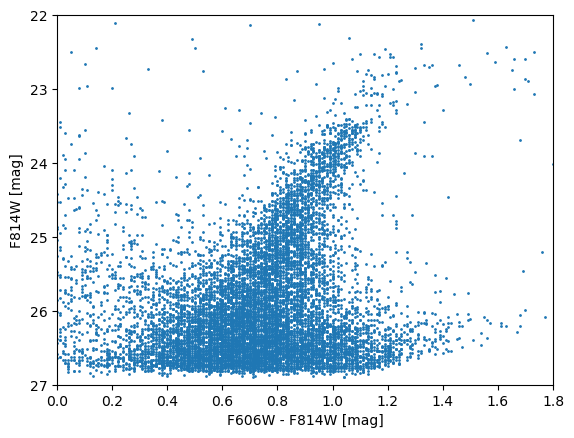

In [72]:
pl.figure()
pl.scatter(f606w-f814w, f814w, s= 1)
pl.ylim(22,27)
pl.gca().invert_yaxis()
pl.ylabel('F814W [mag]')
pl.xlabel('F606W - F814W [mag]')
pl.xlim(0,1.8)
pl.savefig('PreQ_1.jpeg')
pl.show()

In [73]:
######problem 5#########
G102 = np.loadtxt('BASTI-1.02Gyr.txt').T
M20= np.loadtxt('BASTI-20Myr.txt').T
M120 = np.loadtxt('BASTI-120Myr.txt').T

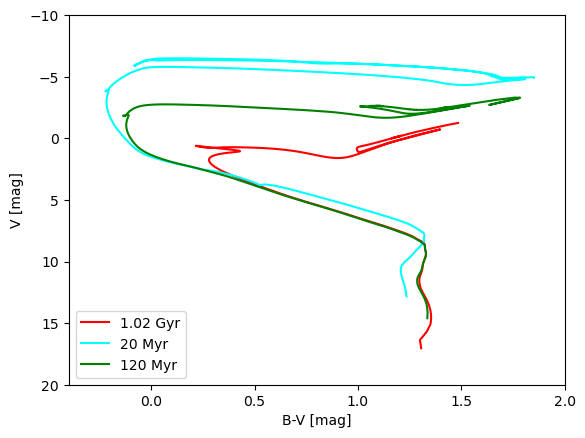

In [74]:
pl.figure()
pl.plot(G102[6]-G102[7],G102[7],label = '1.02 Gyr',c = 'r')
pl.plot(M20[6]-M20[7],M20[7],label = '20 Myr', c= 'cyan')
pl.plot(M120[6]-M120[7],M120[7], label = '120 Myr', c = 'g')
pl.ylim(-10,20)
pl.xlim(-0.4,2.0)
pl.gca().invert_yaxis()
pl.legend()

pl.ylabel('V [mag]')
pl.xlabel('B-V [mag]')
pl.savefig('PreQ_2.jpeg')
pl.show()

In [75]:
#####my own isochrones #####
m50 = np.loadtxt('50z0013970y249P00O1D1E1.isc_john').T
m100 = np.loadtxt('100z0013970y249P00O1D1E1.isc_john').T
m300 = np.loadtxt('300z0013970y249P00O1D1E1.isc_john').T


m50

In [76]:
for i in [50,100,300]:
    globals()['B{}'.format(i)] = globals()['m{}'.format(i)][6]
    globals()['V{}'.format(i)] = globals()['m{}'.format(i)][7]
    globals()['BV{}'.format(i)] = globals()['B{}'.format(i)]-globals()['V{}'.format(i)]

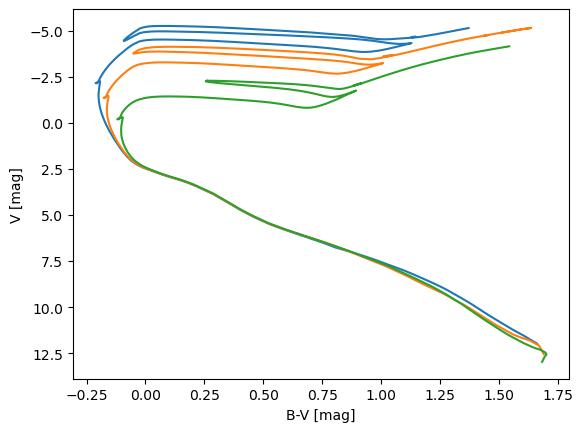

In [77]:
pl.figure()
for i in [50,100,300]:
    age= 100+50*(i-1)
    pl.plot(globals()['BV{}'.format(i)], globals()['V{}'.format(i)], label = 'age = '+str(age)+' Myr')
pl.gca().invert_yaxis()
pl.ylabel('V [mag]')
pl.xlabel('B-V [mag]')
pl.show()